In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pydataset import data
from nycflights13 import flights
import requests
import janitor as jn

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
#Read file
brazil_energy = pd.read_excel("../data/Brazil_Energy.xlsx")

# Convert the 'Year' and 'Value' columns to appropriate data types
brazil_energy['Year'] = brazil_energy['Year'].astype(int)
brazil_energy['Value'] = brazil_energy['Value'].astype(float)

#Check data types
print(brazil_energy.dtypes)

Country       object
Product       object
Flow          object
NoCountry     object
NoProduct     object
NoFlow        object
Year           int64
Value        float64
dtype: object


In [4]:
# Filter the data for different sources of non-renewable energy consumption and renewable total energy supply
coal_consumption = brazil_energy[(brazil_energy['Product'] == 'Coal, peat and oil shale') & 
                                 (brazil_energy['Flow'] == 'Total final consumption (PJ)')].copy()

oil_products_consumption = brazil_energy[(brazil_energy['Product'] == 'Oil products') & 
                                 (brazil_energy['Flow'] == 'Total final consumption (PJ)')].copy()

natural_gas_consumption = brazil_energy[(brazil_energy['Product'] == 'Natural gas') & 
                                 (brazil_energy['Flow'] == 'Total final consumption (PJ)')].copy()

renewable_supply = brazil_energy[(brazil_energy['Product'] == 'Renewables and waste') & 
                                     (brazil_energy['Flow'] == 'Total energy supply (PJ)')].copy()



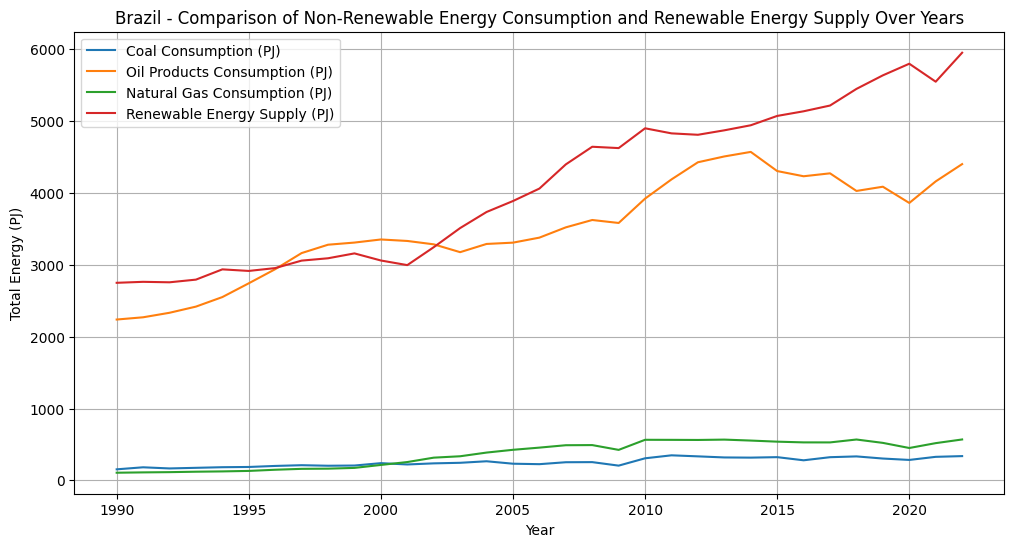

In [5]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(coal_consumption['Year'], coal_consumption['Value'], label='Coal Consumption (PJ)')
plt.plot(oil_products_consumption['Year'], oil_products_consumption['Value'], label='Oil Products Consumption (PJ)')
plt.plot(natural_gas_consumption['Year'], natural_gas_consumption['Value'], label='Natural Gas Consumption (PJ)')
plt.plot(renewable_supply['Year'], renewable_supply['Value'], label='Renewable Energy Supply (PJ)')
plt.xlabel('Year')
plt.ylabel('Total Energy (PJ)')
plt.title('Brazil - Comparison of Non-Renewable Energy Consumption and Renewable Energy Supply Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Calculate the correlation coefficient and p-value for coal consumption vs renewable supply
correlation_coal, p_value_coal = pearsonr(renewable_supply['Value'], coal_consumption['Value'])
print(f'Coal vs Renewable - Correlation coefficient: {correlation_coal}, P-value: {p_value_coal}')

# Calculate the correlation coefficient and p-value for oil products consumption vs renewable supply
correlation_oil, p_value_oil = pearsonr(renewable_supply['Value'], oil_products_consumption['Value'])
print(f'Oil vs Renewable - Correlation coefficient: {correlation_oil}, P-value: {p_value_oil}')

# Calculate the correlation coefficient and p-value for natural gas consumption vs renewable supply
correlation_gas, p_value_gas = pearsonr(renewable_supply['Value'], natural_gas_consumption['Value'])
print(f'Natural Gas vs Renewable - Correlation coefficient: {correlation_gas}, P-value: {p_value_gas}')

Coal vs Renewable - Correlation coefficient: 0.8807958966403701, P-value: 1.3770928679331565e-11
Oil vs Renewable - Correlation coefficient: 0.8817242954444691, P-value: 1.2280874626185455e-11
Natural Gas vs Renewable - Correlation coefficient: 0.9244094663168793, P-value: 1.612630893352259e-14


In [22]:
# Calculate the correlation coefficient
correlation, p_value = pearsonr(renewable_supply['Value'], coal_consumption['Value'])
print(f'Correlation coefficient: {correlation}, P-value: {p_value}')

# Perform linear regression analysis
X = renewable_supply['Value']
y = coal_consumption['Value']

Correlation coefficient: 0.8807958966403701, P-value: 1.3770928679331565e-11
